# Term Deposit Marketing Campaign Analysis

The aim of the marketing campaign was to get customers to subscribe to a bank term deposit product. Whether they did this or not is variable ‘y’ in the data set. The bank in question is considering how to optimise this campaign in future.

What would your recommendations to the marketing manager be?

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Import Data

##### Step 1a: Read tab delimited file and review dataframe

In [7]:
# read in tab delimited data file
inp = pd.read_csv('../Data/Bank_Marketing_Downloads.txt', header=0, sep='\t')

# review first five records of inp dataframe
inp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
print('Dataframe contains', len(inp), 'rows and', len(inp.columns), 'columns')

Dataframe contains 45211 rows and 17 columns


### Step 2: Data Exploration

##### Step 2a: Review data type and check for null values for each column

In [14]:
# print column data types and check for any columns with null values
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dataframe (inp) has 7 numerical and 10 categorical columns. None of these columns have any null values

##### Step 2b: Explore numerical columns

In [16]:
# summary stats for numerical columns
inp.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Observations:**
* Mean age is approximately 41, with minimum age 18 and maximum age 95
* Mean balance is $1362. However standard deviation is a high number suggesting balance amount is more spread out and indicating outliers in the dataset
* Although duration of call might not be important ie: the longer the call, the more likely customer subscribes to term deposit. However, I am keen to investigate what was the mean call duration of customers who subscribed. More on this a little further down this notebook.

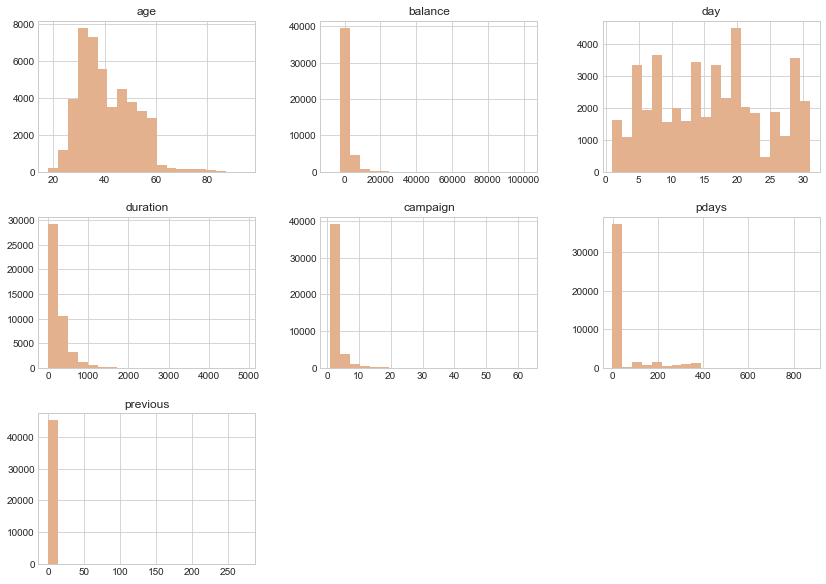

In [17]:
# distribution of each int columns
plt.style.use('seaborn-whitegrid')

inp.hist(bins=20, figsize=(14,10), color='#e3b18d')
plt.show()

We can see that numerical columns have outliers, especially 'campaign', 'pdays' and 'previous' columns), indicating outliers of possibly noisy data (incorrect value).